# Simple LUME-Genesis example

In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

In [2]:
from genesis import Genesis

# Make genesis object with some input file
G = Genesis('data/basic/genesis.in', verbose=True)

Using found executable: /Users/chrisonian/Code/genesis/bin/genesis
loading lattice:  /Users/chrisonian/Code/GitHub/lume-genesis/examples/data/basic/genesis_lattice.in
Configured to run in: /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmp50lk20q5


In [3]:
# Turn on field output
G['idmpfld'] = 1
# Turn on particle output
G['idmppar'] = 1
G['npart'] = 2048

# Turn on history
G['ippart'] = 10
G['ipradi'] = 0

In [4]:
# Run genesis with default lattice 
G.run()

Running genesis in /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmp50lk20q5
/var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmp50lk20q5 genesis_lattice.in
Lattice written: /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmp50lk20q5/genesis_lattice.in
-------------------------------
Genesis 1.3 has begun execution
(Version 1.0 Unix)

Please enter input file name 
***  Warning: Size of particle file [Mbytes]:  14     
Slice     1: Simulation  10% completed.
Slice     1: Simulation  20% completed.
Slice     1: Simulation  30% completed.
Slice     1: Simulation  40% completed.
Slice     1: Simulation  50% completed.
Slice     1: Simulation  60% completed.
Slice     1: Simulation  70% completed.
Slice     1: Simulation  80% completed.
Slice     1: Simulation  90% completed.
Slice     1: Simulation 100% completed.
***  writing history record for slice     1
***  closing files

Genesis run has finished
------------------------
Loaded output: /var/folders/wj/lfgr01993dx79p9cm_skykbw0000g

In [5]:
G.output.keys()

dict_keys(['run_info', 'param', 'data'])

In [6]:
G.output['data'].keys()

dict_keys(['z', 'aw', 'qfld', 'index', 'current', 'power', 'increment', 'p_mid', 'phi_mid', 'r_size', 'energy', 'bunching', 'xrms', 'yrms', 'error', '<x>', '<y>', 'e-spread', 'far_field', 'dfl', 'dpa', 'par'])

In [7]:
G.write_wavefront()

Writing wavefront (dfl data) to file genesis_wavefront_ac527a9a7ba0aa9d23cc0977b9eb4d59.h5


'genesis_wavefront_ac527a9a7ba0aa9d23cc0977b9eb4d59.h5'

In [8]:
G.archive()

Archiving to file genesis_ac527a9a7ba0aa9d23cc0977b9eb4d59.h5
Archived output: param, data, run_info


'genesis_ac527a9a7ba0aa9d23cc0977b9eb4d59.h5'

In [9]:
# This is the working path
G.path

'/var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmp50lk20q5'

In [10]:
# Contents of this
!ls -ahl {G.path}

total 33896
drwx------   10 chrisonian  staff   320B Jan 23 19:39 .
drwx------@ 145 chrisonian  staff   4.5K Jan 23 19:39 ..
-rw-r--r--    1 chrisonian  staff   2.2K Jan 23 19:39 genesis.in
-rw-r--r--    1 chrisonian  staff   370K Jan 23 19:39 genesis.out
-rw-r--r--    1 chrisonian  staff   984K Jan 23 19:39 genesis.out.dfl
-rw-r--r--    1 chrisonian  staff    96K Jan 23 19:39 genesis.out.dpa
-rw-r--r--    1 chrisonian  staff    15M Jan 23 19:39 genesis.out.par
-rw-r--r--    1 chrisonian  staff   1.3K Jan 23 19:39 genesis_lattice.in
-rw-r--r--    1 chrisonian  staff   1.3K Jan 23 19:39 genesis_lattice.out
-rwxr-xr-x    1 chrisonian  staff    53B Jan 23 19:39 run


In [11]:
# Get a hash of the input
G.fingerprint()

'ac527a9a7ba0aa9d23cc0977b9eb4d59'

In [12]:
# Loads the lattice file. Note that this has already been done on init. 
G.load_lattice()

loading lattice:  /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmp50lk20q5/genesis_lattice.in


In [13]:
# Lattice parameters
G.lattice['param']

{'version': 1, 'unitlength': 0.03}

In [14]:
# Get a list of z from the output
G.output.keys()

dict_keys(['run_info', 'param', 'data'])

In [15]:
# These are the available data
G.output['data'].keys()

dict_keys(['z', 'aw', 'qfld', 'index', 'current', 'power', 'increment', 'p_mid', 'phi_mid', 'r_size', 'energy', 'bunching', 'xrms', 'yrms', 'error', '<x>', '<y>', 'e-spread', 'far_field', 'dfl', 'dpa', 'par'])

In [16]:
zlist = G.output['data']['z']
zlist.shape

(1561,)

In [17]:
# Get power. This is a 2d array of: slice, z
power = G.output['data']['power']
power.shape

(1, 1561)

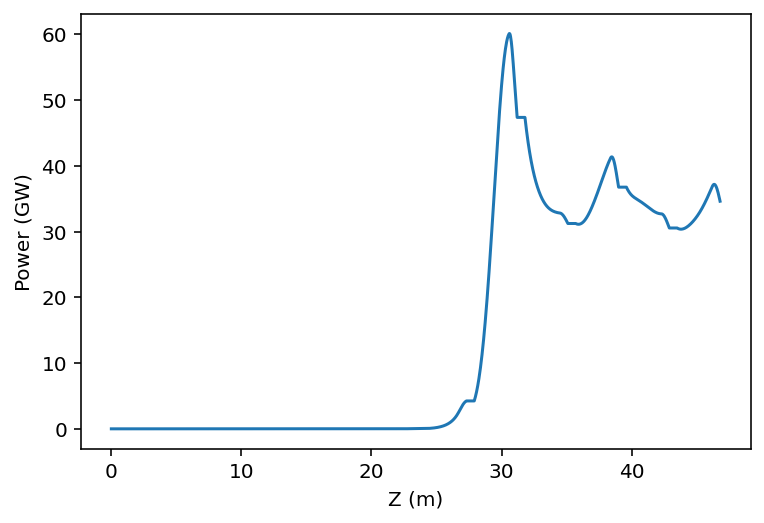

In [18]:
# Simpler plot

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

plt.xlabel('Z (m)')
plt.ylabel('Power (GW)')

plt.plot(zlist, power[0]/1e9)


# Archiving

In [19]:
afile = G.archive()

Archiving to file genesis_ac527a9a7ba0aa9d23cc0977b9eb4d59.h5
Archived output: param, data, run_info


In [20]:
G2 = Genesis()
G2.load_archive(afile)

In [21]:
# Check that fingetprints (hash on input) are the same
G.fingerprint() == G2.fingerprint()

True

In [22]:
import numpy as np


# Check that all output data are the same
for k in G.output['data']:
    print(k, np.all(G.output['data'][k]==G2.output['data'][k]))

z True
aw True
qfld True
index True
current True
power True
increment True
p_mid True
phi_mid True
r_size True
energy True
bunching True
xrms True
yrms True
error True
<x> True
<y> True
e-spread True
far_field True
dfl True
dpa True
par True


# Wavefront (dfl) in openPMD-wavefront format

This will write the loaded `dfl` data to a proper openPMD-wavefront file

In [23]:
wfile = G.write_wavefront()

Writing wavefront (dfl data) to file genesis_wavefront_ac527a9a7ba0aa9d23cc0977b9eb4d59.h5


In [24]:
# Read back
import h5py
with h5py.File(wfile, 'r') as h5:
    component = h5['data/000000/meshes/electricField/x']
    E = component[:]
    attrs = dict(component.attrs)

# This is the conversion factor to the proper SI unit for electric field    
attrs

{'unitSI': 4574872.878997542, 'unitSymbol': 'V/m'}

In [25]:
# Check the shapes
E.shape

(251, 251, 1)

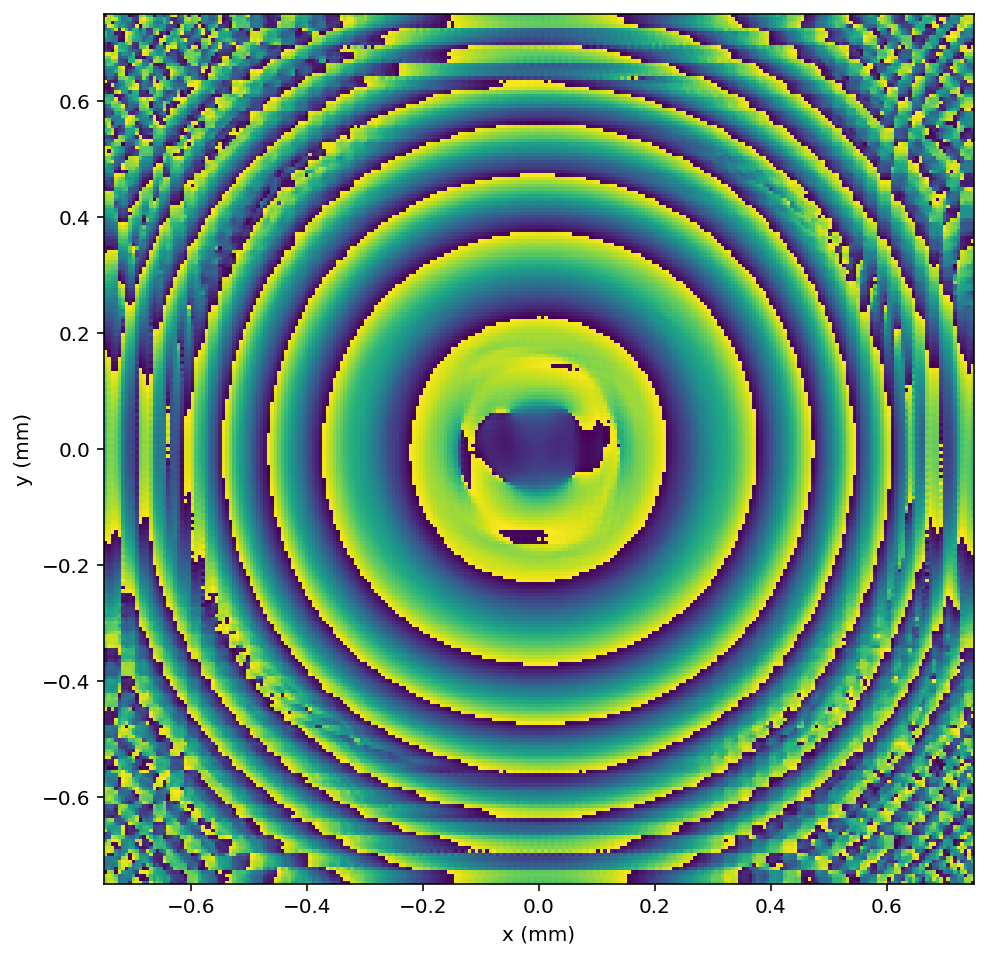

In [26]:
# Plot the phase
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8,8]


ndat = np.angle(E[:,:,0]) # Complex angle
plt.imshow(ndat, extent = [1e3*G['dgrid']*i for i in [-1,1,-1,1]])
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.show()

# Particle file

In [27]:

import numpy as np
import os
import time

In [28]:
# gamma, phase, x, y, px/mc, py/mc
b = G.output['data']['par']

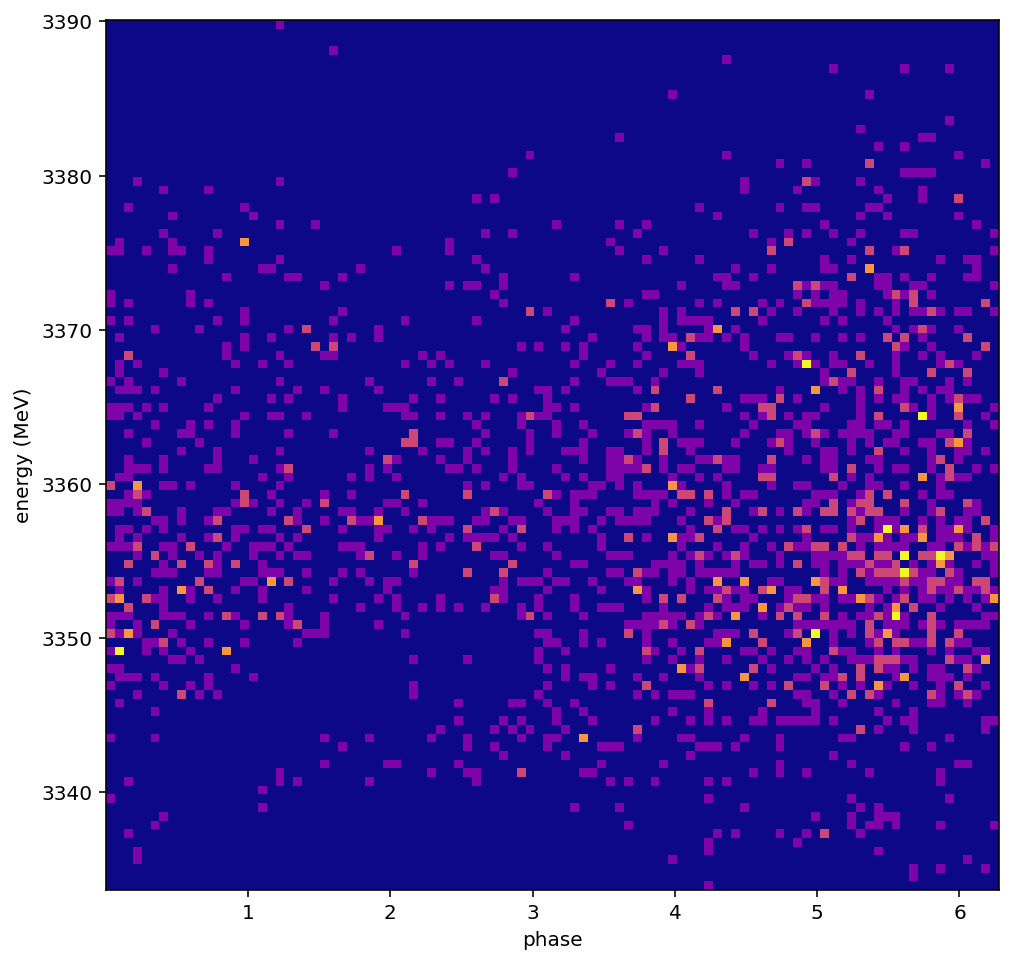

In [29]:
p = b[-1]
plt.hist2d(p[1]% (2*np.pi), 0.511*p[0], bins=[100,100], cmap=plt.get_cmap('plasma'))
plt.xlabel('phase')
plt.ylabel('energy (MeV)')
#plt.savefig('frame.png')
plt.show()

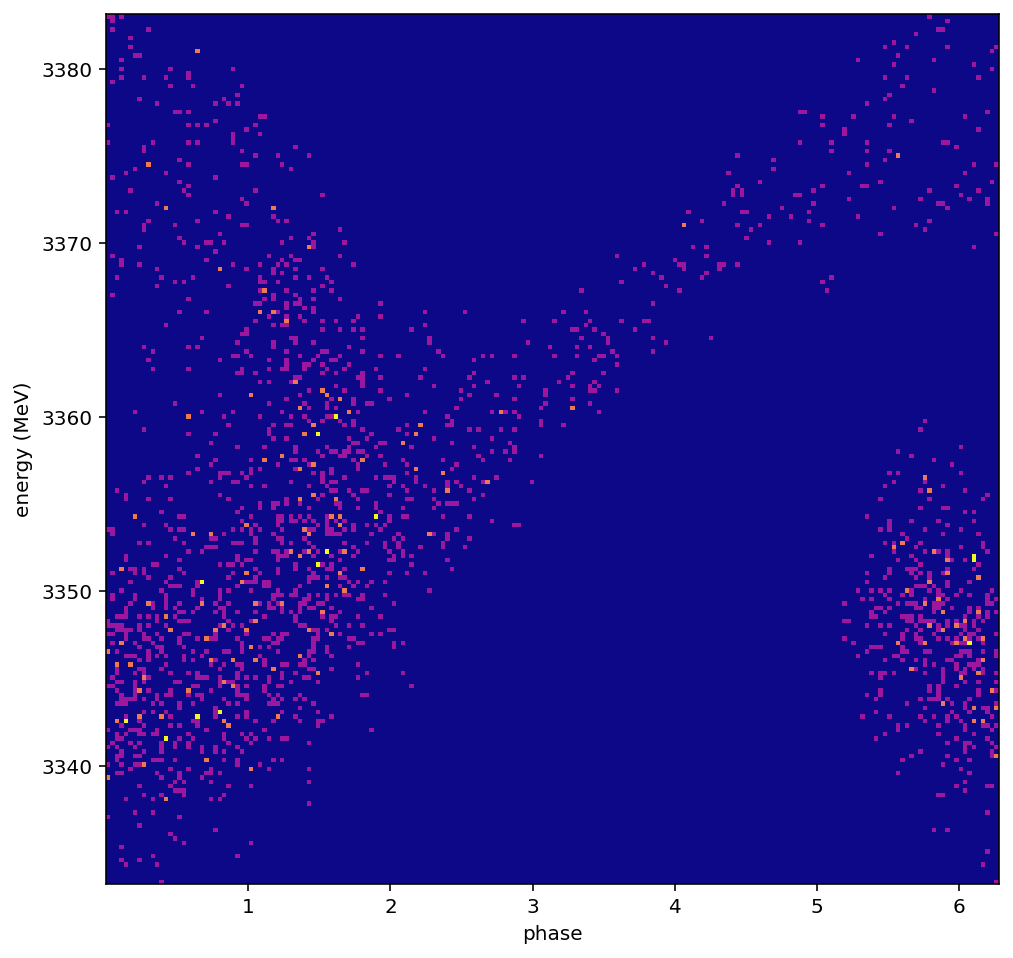

In [30]:
def frame(i, ):
    p = b[i]
    plt.hist2d(p[1]% (2*np.pi), 0.511*p[0], bins=[200,200], cmap=plt.get_cmap('plasma'))
    plt.xlabel('phase')
    plt.ylabel('energy (MeV)')
   # plt.savefig('frame_'+str(i)+'.png')
    
frame(100)

In [31]:
# Make frames
#for i in range(nbunch):
#    frame(i);

In [32]:
# Make movie
#!ffmpeg -framerate 10 -i frame_%d.png -c:v libx264 -c:a libfdk_aac output.mp4

In [33]:
# Cleanup
os.remove(afile)
os.remove(wfile)